In [1]:
import numpy as np
import argparse
import matplotlib.pyplot as plt
import os
from tqdm import tqdm_notebook as tqdm

In [25]:
def get_color(counter):
    counter += 1
    return 'C'+str(counter), counter

def smooth(x, N=30):
    cumsum = np.cumsum(np.insert(x, 0, 0))
    return (cumsum[N:] - cumsum[:-N]) / float(N)

def save_file(data_mean, file_name):
    with open(file_name,'w') as f:
        for i in range(len(data_mean)):
            f.write("%d\n" % data_mean[i])

def plot_data(env_type, data_mean, data_std,title, color,label='',y_label=''):
    data_x = range(len(smooth(data_mean)))
    data_y_plus = smooth(data_mean+data_std)
    data_y_minus = smooth(data_mean-data_std)

    plt.rcParams["figure.figsize"] = (30,20)
    plt.plot(smooth(data_mean),color=color, label=label)
    plt.fill_between(data_x,data_y_plus,data_y_minus,color=color,alpha=0.2)
    plt.xlabel('Episodes ['+ env_type + ']')
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid()
    # from matplotlib.font_manager import FontProperties
    #
    # fontP = FontProperties()
    # fontP.set_size('small')
    # plt.legend(bbox_to_anchor=(1.04, 0.5), loc="center left", borderaxespad=0, prop=fontP)
    # plt.tight_layout(rect=[0, 0, 0.75, 1])

    plt.legend(shadow=True)


In [26]:
def read_files(path, env, replay):
    
    print("loading files")
    files = os.listdir(path)
    
    data = []

    for fd_name in tqdm(files):
        if ('.npy' in fd_name) and (env in fd_name) and (replay in fd_name):
            data.append(np.load(path + "/" +fd_name))
    
    data_m = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    
    return data_m, data_std


loading files



loading files



loading files


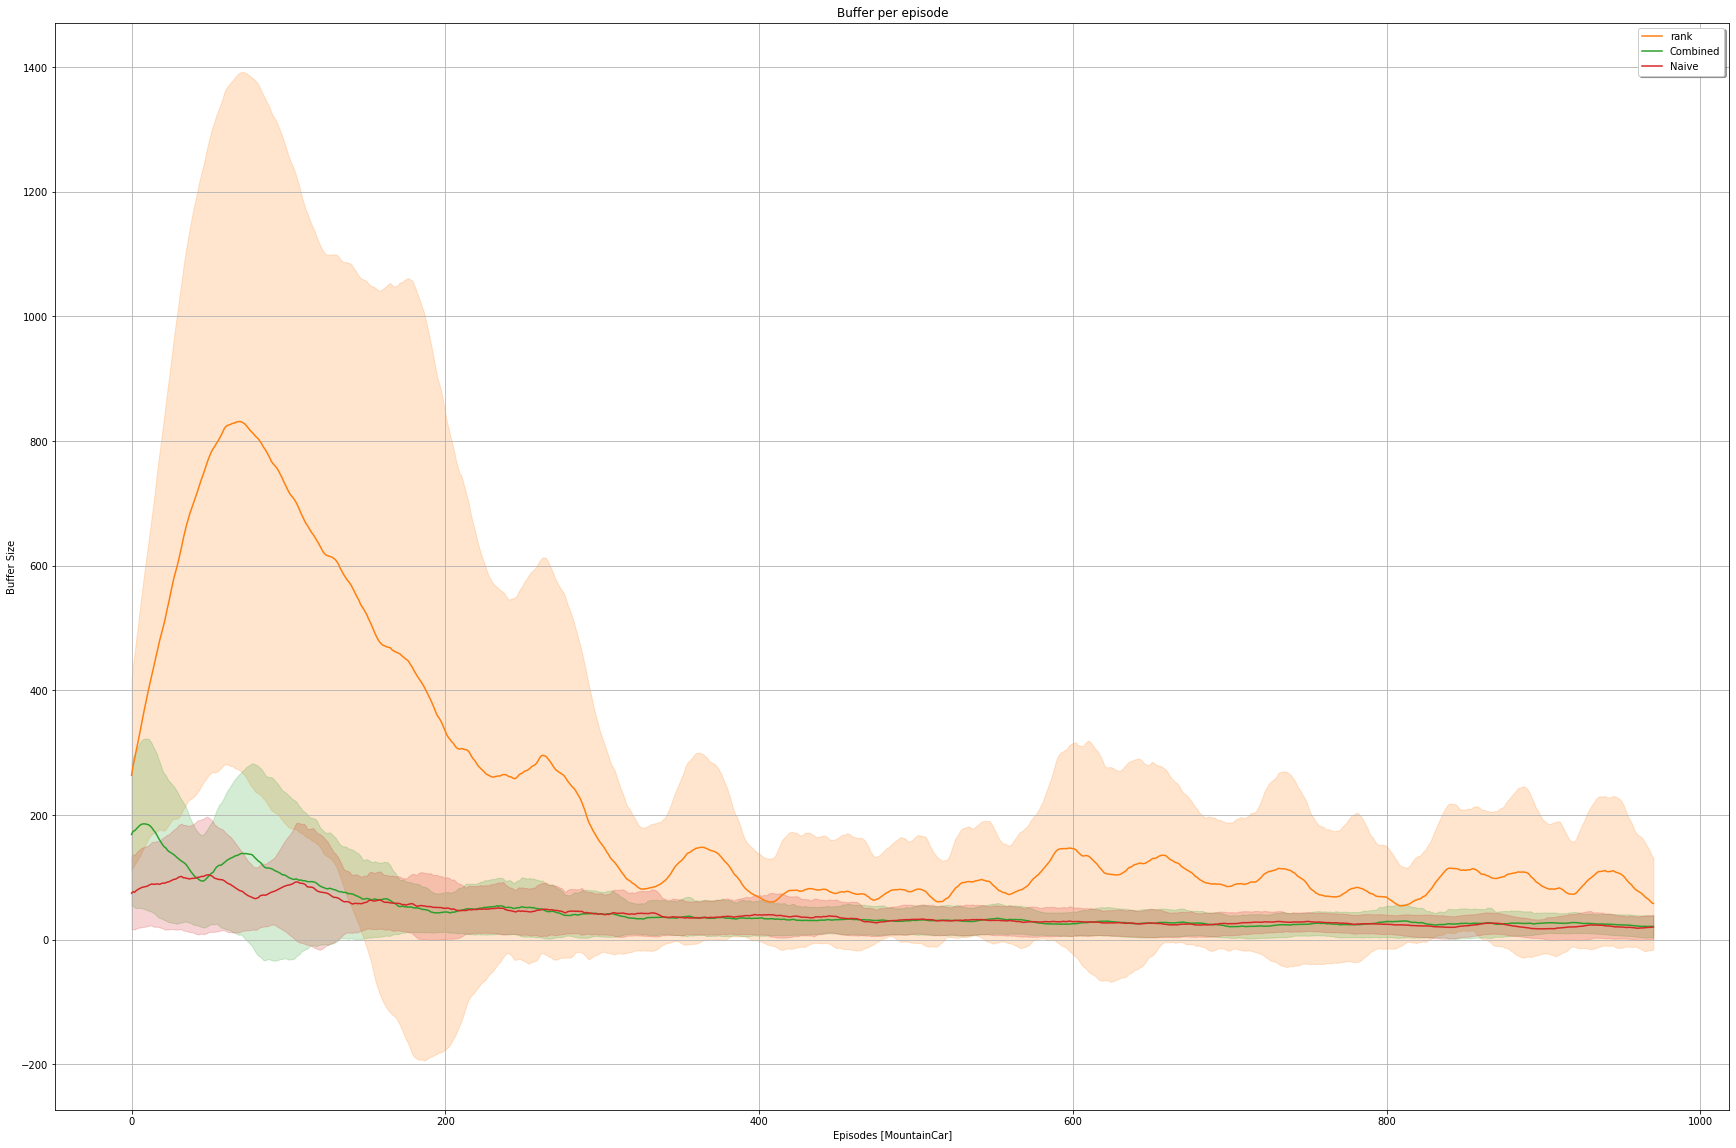

loading files



loading files



loading files


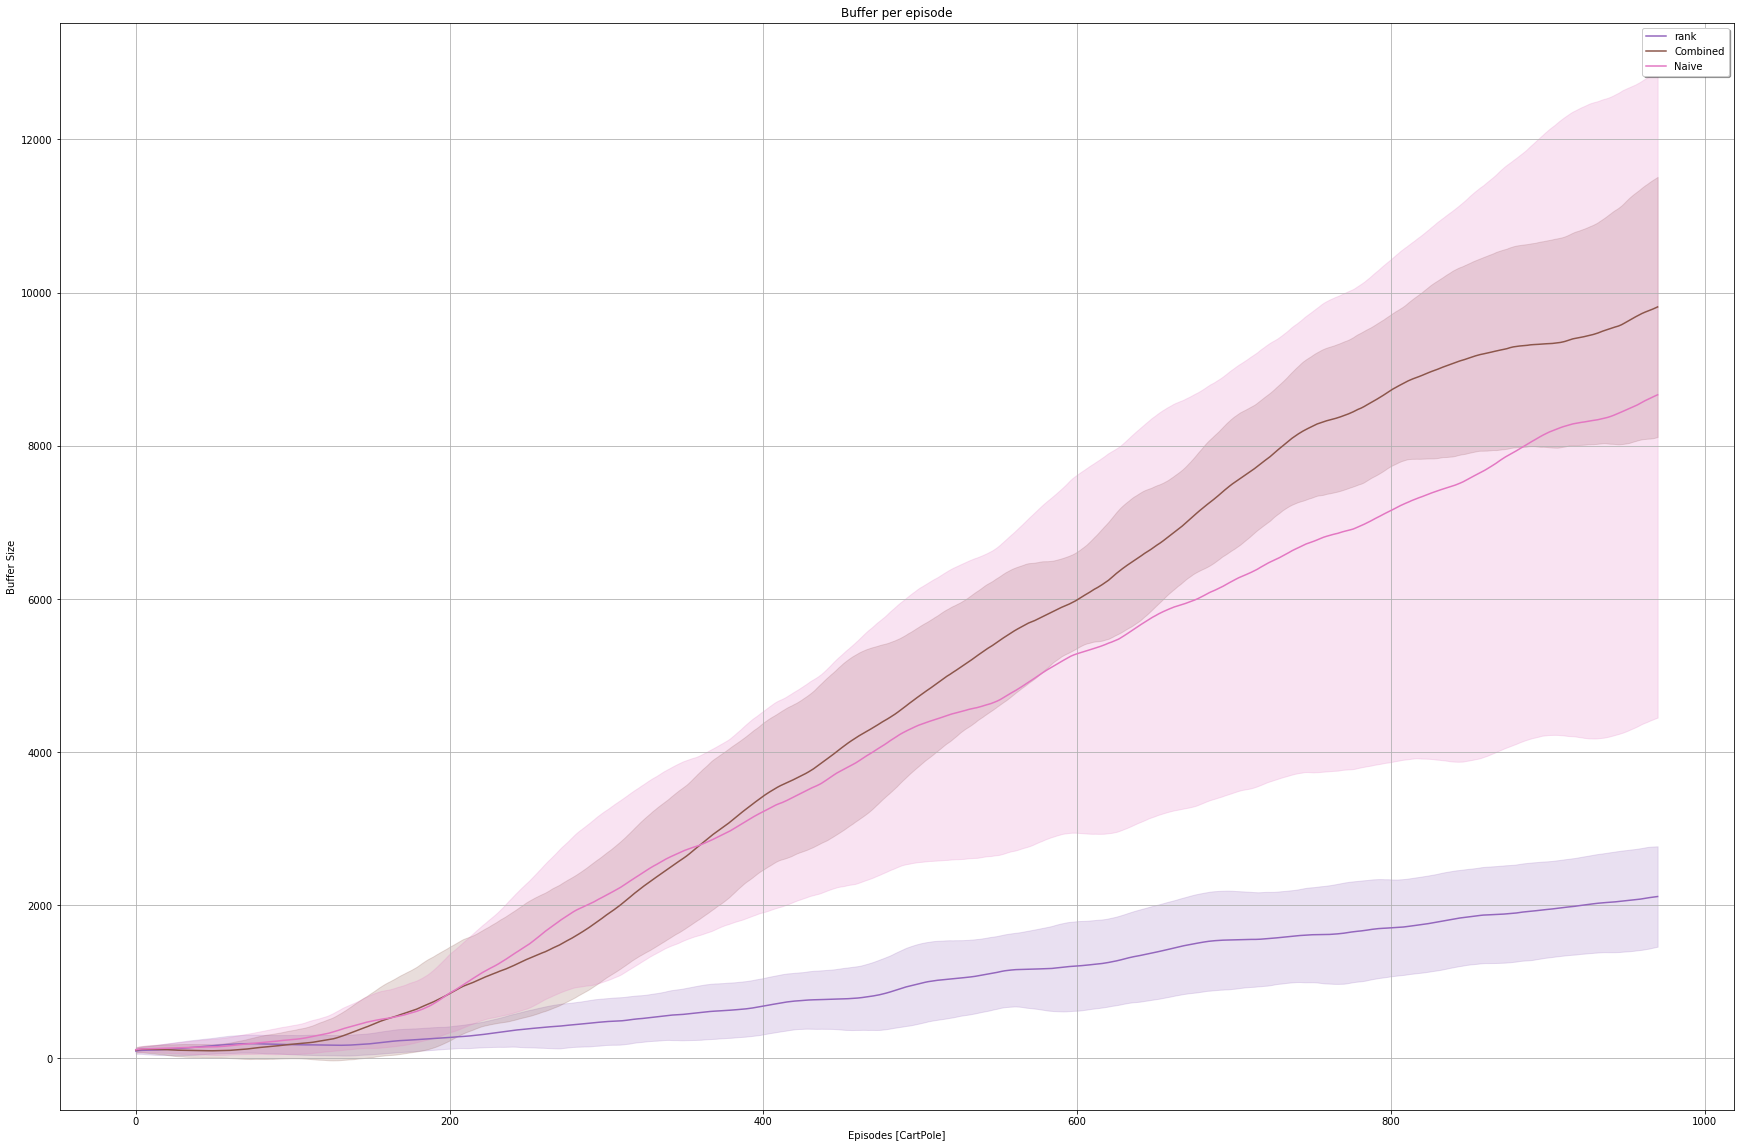

loading files



loading files



loading files


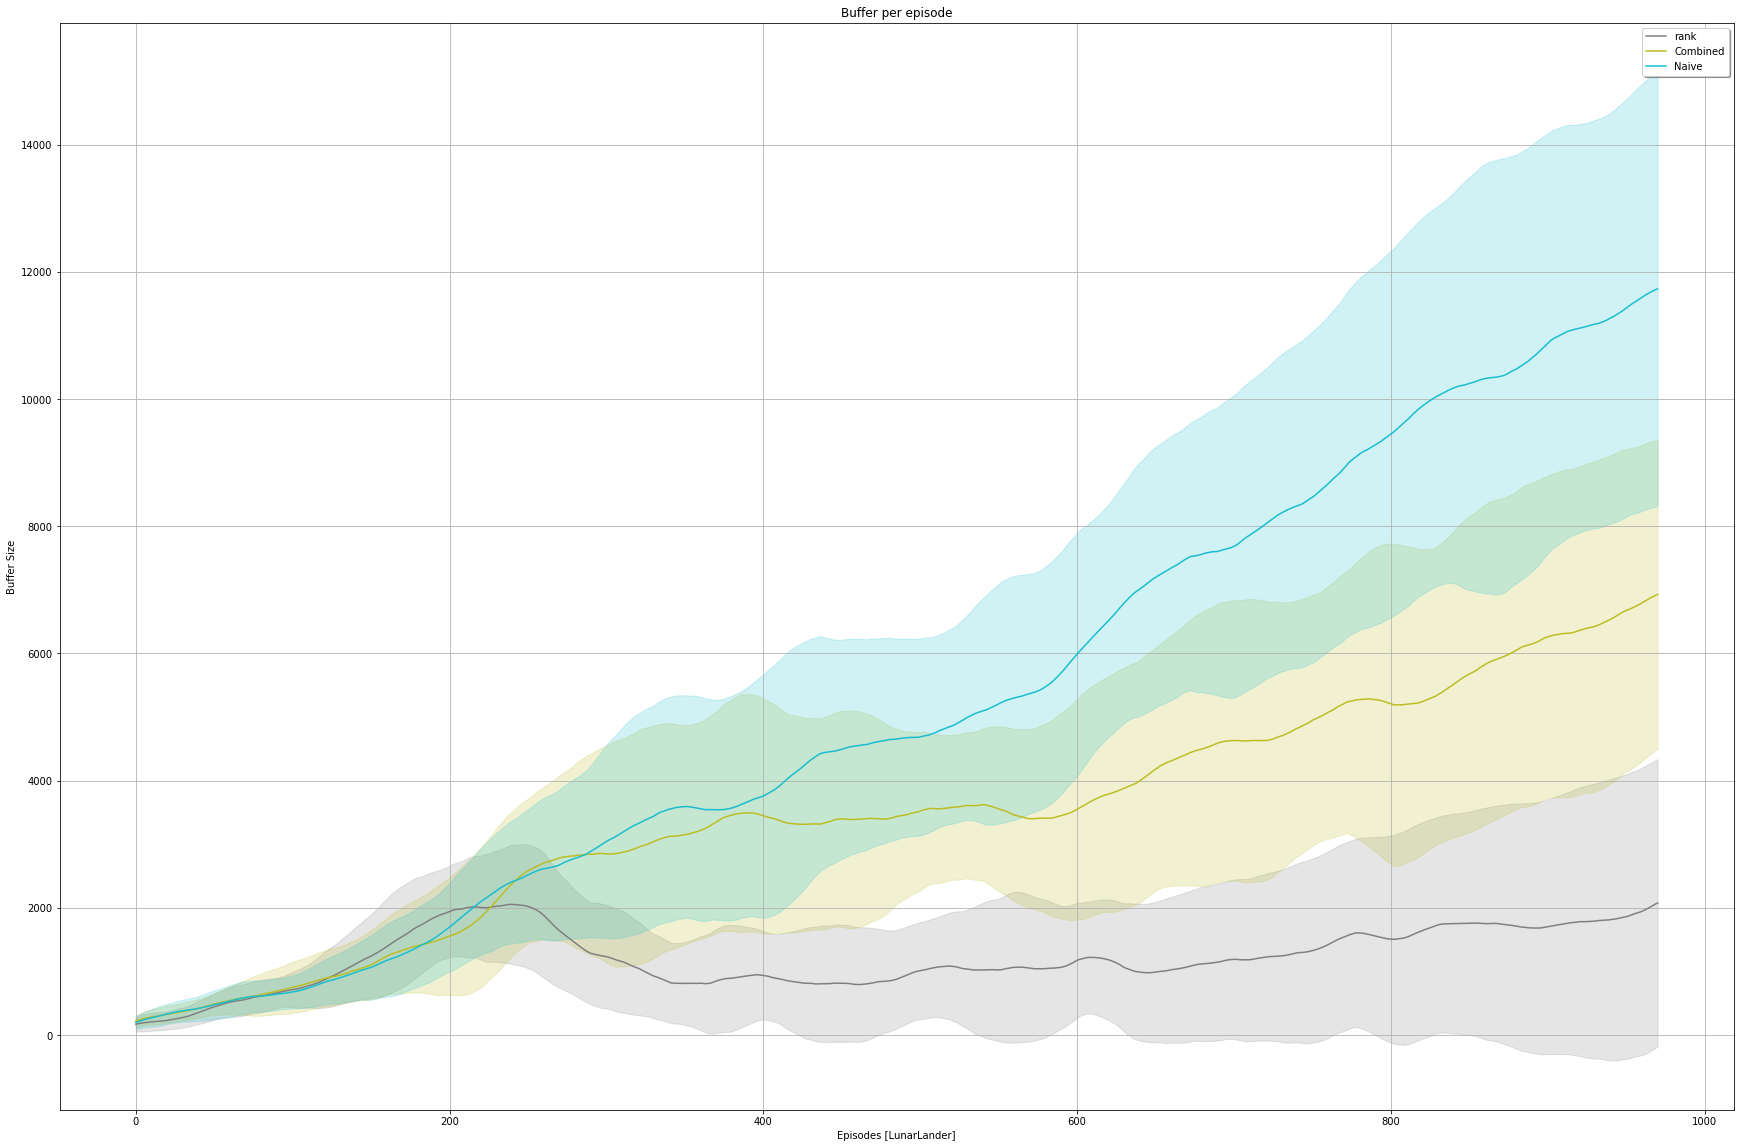

In [27]:

envs = ["MountainCar", "CartPole", "LunarLander"]
replays = ["rank", "Combined", "Naive"]
parent_path = "../adaptive_buffer/results"

counter = 0
for env in envs:

    for r, replay in enumerate(replays):
        mean, std = read_files(parent_path, env, replay)
    
        #get color
        color, counter = get_color(counter)
        plot_data(env, mean, std, 'Buffer per episode', color, label=replay, y_label='Buffer Size')
        
    plt.savefig(parent_path + f'/{env}_buffer.png')
    plt.show()
        
        


In [ ]:
parent_path = "../adapitive_buffer/results"
plot_comb_experiments(parent_path)